In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/ADA-USD.csv")

In [3]:
df.shape

(1598, 7)

DATA PREPROCESSING


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1593,2022-03-21,0.877201,0.927599,0.865919,0.916782,0.916782,1233477886
1594,2022-03-22,0.916888,0.985033,0.909592,0.976440,0.976440,1699537576
1595,2022-03-23,0.976162,1.107482,0.959068,1.107482,1.107482,3447683427
1596,2022-03-24,1.107204,1.185751,1.085422,1.130011,1.130011,3671006856
1597,2022-03-25,1.131003,1.162346,1.095253,1.107894,1.107894,2845730816


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1593,2022-03-21,0.877201,0.927599,0.865919,0.916782,0.916782,1233477886
1594,2022-03-22,0.916888,0.985033,0.909592,0.976440,0.976440,1699537576
1595,2022-03-23,0.976162,1.107482,0.959068,1.107482,1.107482,3447683427
1596,2022-03-24,1.107204,1.185751,1.085422,1.130011,1.130011,3671006856
1597,2022-03-25,1.131003,1.162346,1.095253,1.107894,1.107894,2845730816


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,0.484421,0.506568,0.460876,0.485099,0.485099,1.207042e+09
std,0.670545,0.699241,0.640042,0.670711,0.670711,2.202736e+09
min,0.023954,0.025993,0.019130,0.023961,0.023961,2.930550e+06
25%,0.053023,0.055959,0.051386,0.053311,0.053311,6.421904e+07
50%,0.113265,0.118593,0.106945,0.113522,0.113522,1.851726e+08
75%,0.856796,0.903917,0.818793,0.858310,0.858310,1.374642e+09
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [ ]:
float_columns = df.select_dtypes(include=['float64'])

In [ ]:
correlation_matrix=float_columns.corr()
correlation_matrix

,Open,High,Low,Close,Adj Close
Open,1.000000,0.998320,0.997371,0.997045,0.997045
High,0.998320,1.000000,0.996689,0.998911,0.998911
Low,0.997371,0.996689,1.000000,0.997985,0.997985
Close,0.997045,0.998911,0.997985,1.000000,1.000000
Adj Close,0.997045,0.998911,0.997985,1.000000,1.000000


In [5]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Calculate the 200-day Simple Moving Average (SMA)
df['SMA_200'] = df['Close'].rolling(window=200).mean()

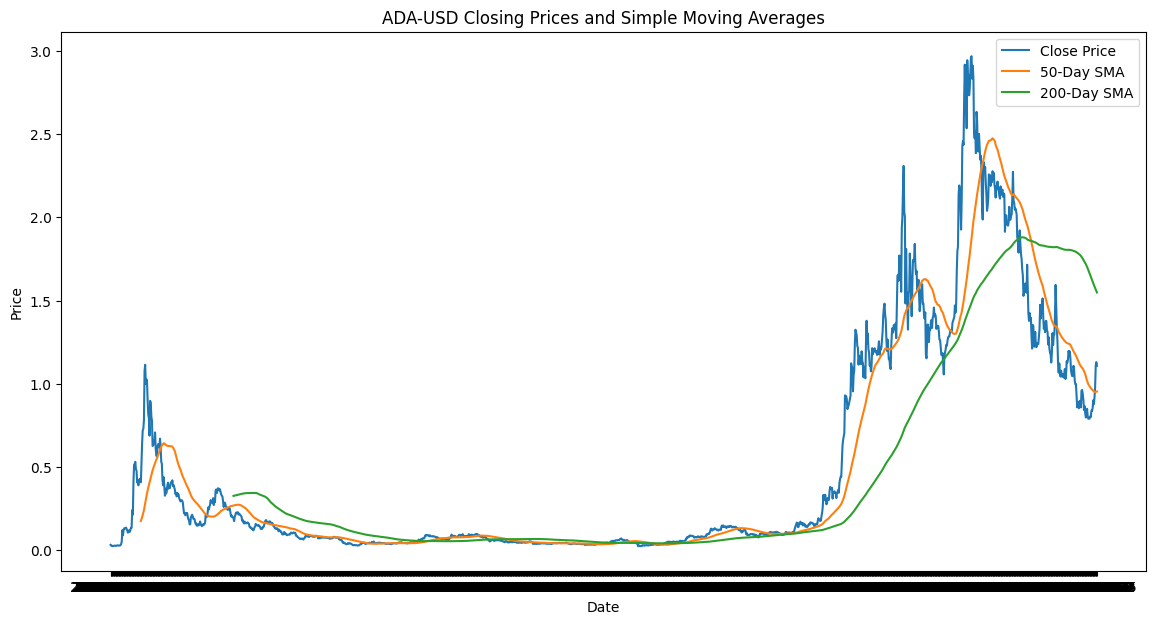

In [6]:

# Plot the closing prices and SMA
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_50'], label='50-Day SMA')
plt.plot(df['Date'], df['SMA_200'], label='200-Day SMA')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ADA-USD Closing Prices and Simple Moving Averages')
plt.legend()

# Show the plot
plt.show()

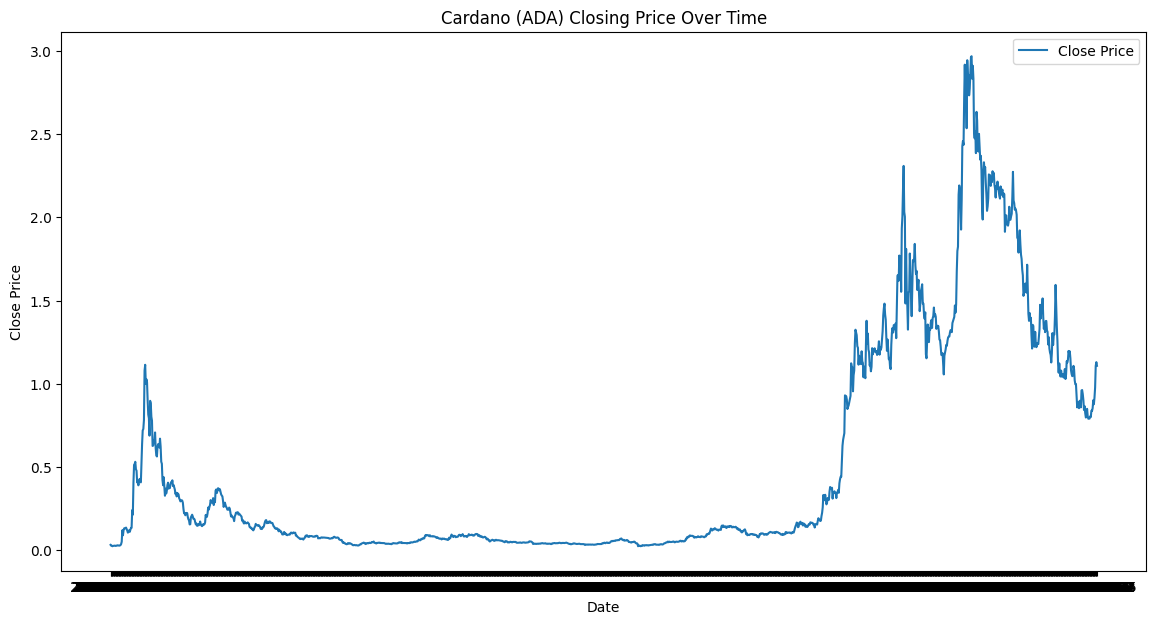

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cardano (ADA) Closing Price Over Time')
plt.legend()
plt.show()

In [7]:
df['Change'] = df['Close'].diff()

# Calculate gains and losses
df['Gain'] = np.where(df['Change'] > 0, df['Change'], 0)
df['Loss'] = np.where(df['Change'] < 0, -df['Change'], 0)

# Calculate the average gain and loss
window = 14
df['AvgGain'] = df['Gain'].rolling(window=window, min_periods=1).mean()
df['AvgLoss'] = df['Loss'].rolling(window=window, min_periods=1).mean()

# Calculate the Relative Strength (RS)
df['RS'] = df['AvgGain'] / df['AvgLoss']

# Calculate the Relative Strength Index (RSI)
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Drop NaN values (they appear in the beginning due to rolling calculation)
df = df.dropna()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,Change,Gain,Loss,AvgGain,AvgLoss,RS,RSI
199,2018-05-27,0.196354,0.196436,0.192322,0.193557,0.193557,58991000,0.268651,0.326517,-0.003010,0.000000,0.003010,0.001490,0.008085,0.184294,15.561523
200,2018-05-28,0.193696,0.194977,0.174002,0.174783,0.174783,95106200,0.269015,0.327230,-0.018774,0.000000,0.018774,0.001490,0.008537,0.174552,14.861120
201,2018-05-29,0.175475,0.208739,0.174153,0.203190,0.203190,185184000,0.270016,0.328111,0.028407,0.028407,0.000000,0.003519,0.007588,0.463773,31.683398
202,2018-05-30,0.203685,0.218023,0.201184,0.211143,0.211143,222612000,0.271112,0.329029,0.007953,0.007953,0.000000,0.004087,0.007318,0.558510,35.836141
203,2018-05-31,0.210393,0.230057,0.206205,0.225214,0.225214,202076000,0.272296,0.330035,0.014071,0.014071,0.000000,0.005092,0.006410,0.794411,44.271396


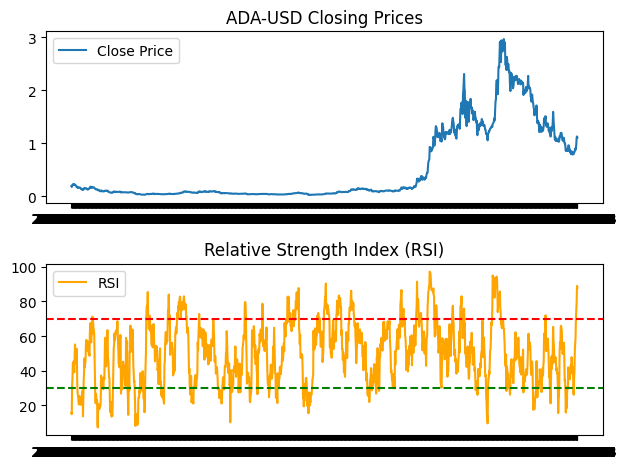

In [9]:
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('ADA-USD Closing Prices')
plt.legend()

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
short_window = 12
long_window = 26
signal_window = 9
df['EMA_12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=long_window, adjust=False).mean()

# Calculate the MACD line (difference between the two EMAs)
df['MACD'] = df['EMA_12'] - df['EMA_26']

# Calculate the Signal line (EMA of the MACD line)
df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

# Calculate the MACD histogram (difference between the MACD line and the Signal line)
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

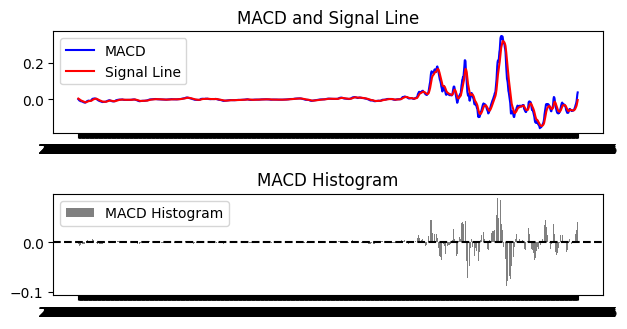

In [15]:
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.legend()

# Plot MACD Histogram
plt.subplot(3, 1, 3)
plt.bar(df['Date'], df['MACD_Histogram'], label='MACD Histogram', color='gray')
plt.axhline(0, color='black', linestyle='--')
plt.title('MACD Histogram')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
period = 14

# Calculate the ROC
df['ROC'] = ((df['Close'] - df['Close'].shift(period)) / df['Close'].shift(period)) * 100

# Drop NaN values that appear due to the shifting operation
df = df.dropna()

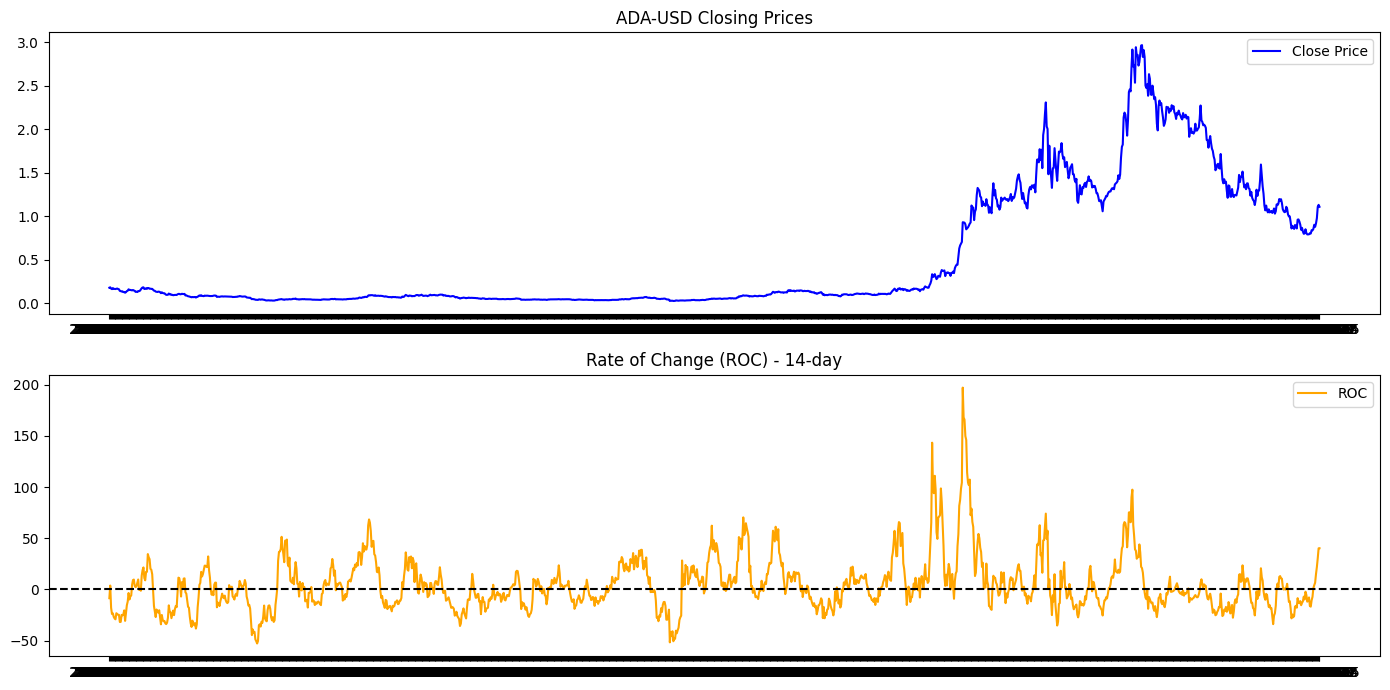

In [14]:


# Plot the data
plt.figure(figsize=(14, 7))

# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('ADA-USD Closing Prices')
plt.legend()

# Plot ROC
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['ROC'], label='ROC', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title(f'Rate of Change (ROC) - {period}-day')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

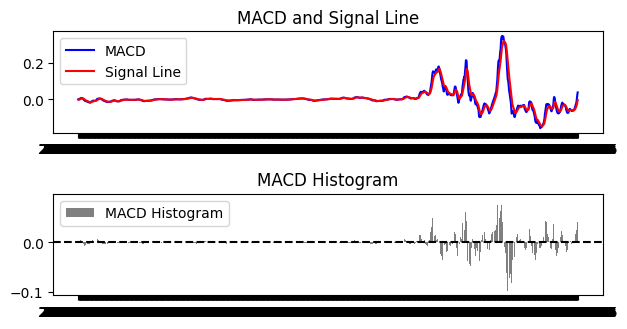

In [12]:
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.legend()

# Plot MACD Histogram
plt.subplot(3, 1, 3)
plt.bar(df['Date'], df['MACD_Histogram'], label='MACD Histogram', color='gray')
plt.axhline(0, color='black', linestyle='--')
plt.title('MACD Histogram')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

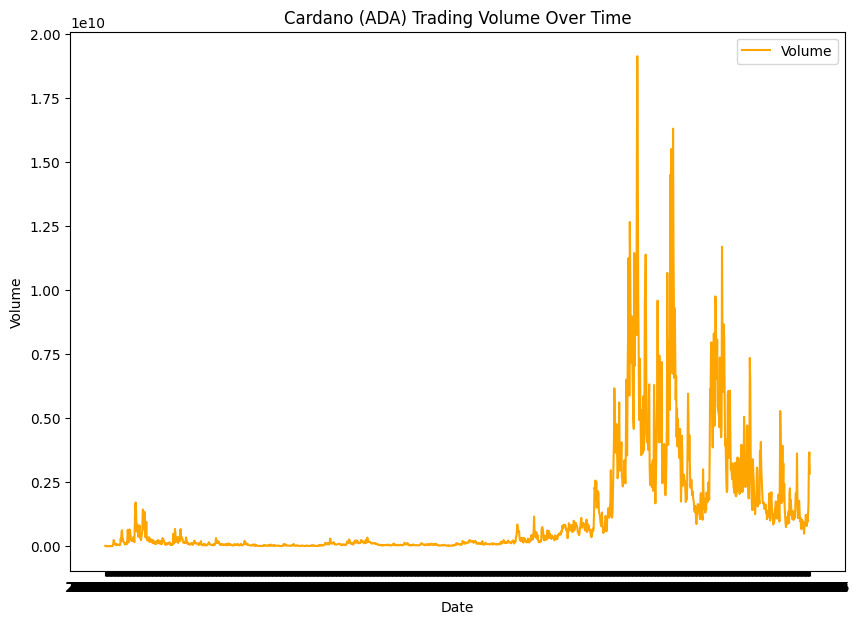

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Cardano (ADA) Trading Volume Over Time')
plt.legend()
plt.show()

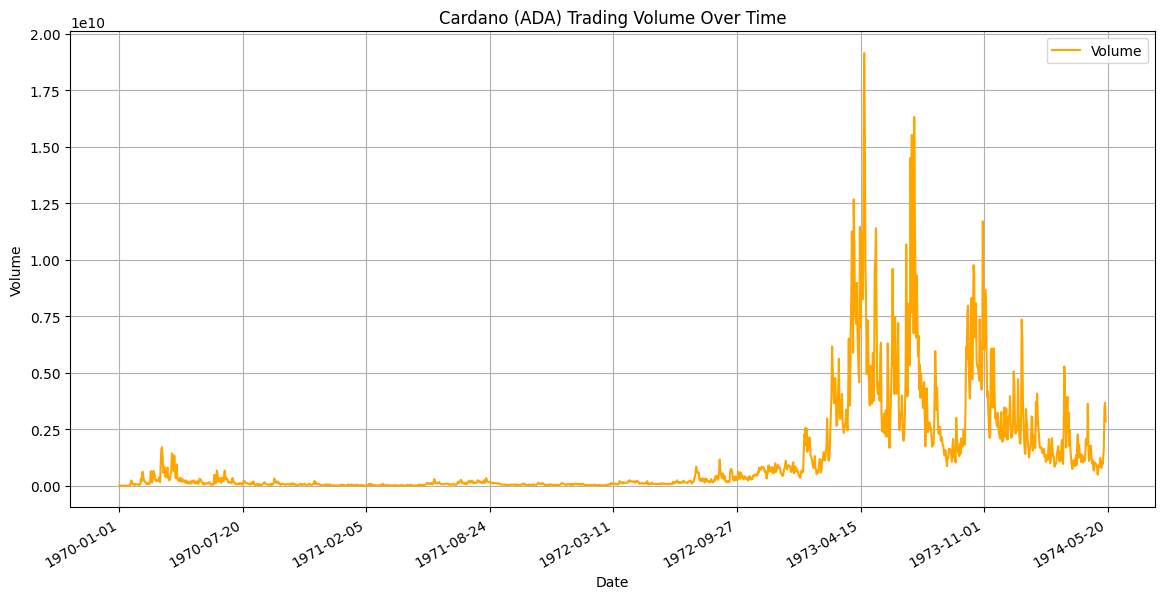

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Cardano (ADA) Trading Volume Over Time')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-axis labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto-format the dates for better readability
plt.show()


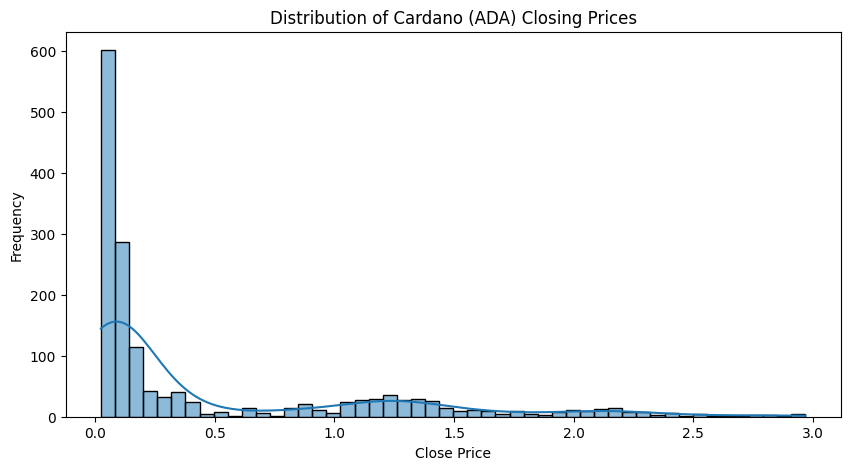

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Cardano (ADA) Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

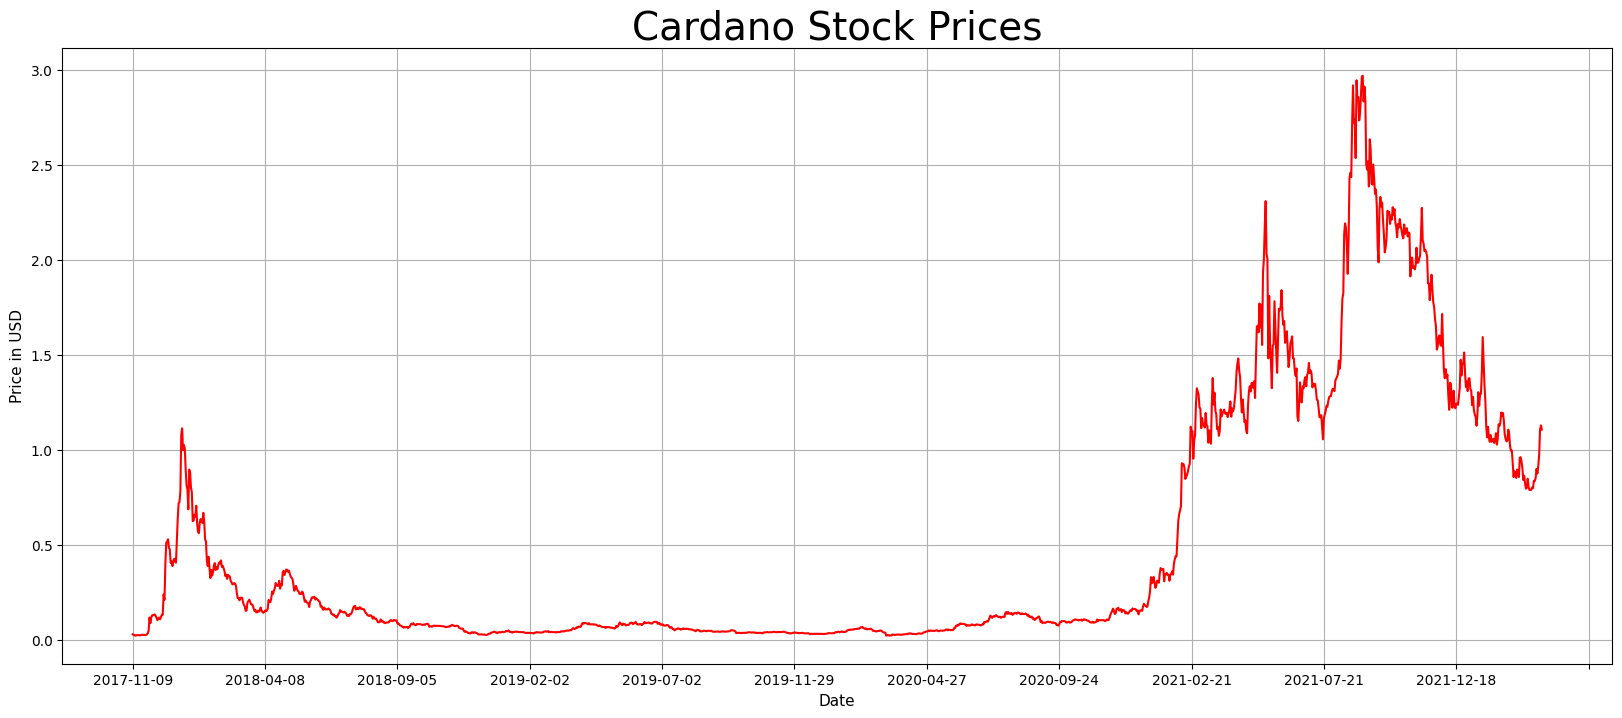

In [ ]:
import matplotlib.dates as mpl_dates
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Cardano Stock Prices', fontsize='28')
plt.grid()
plt.show()


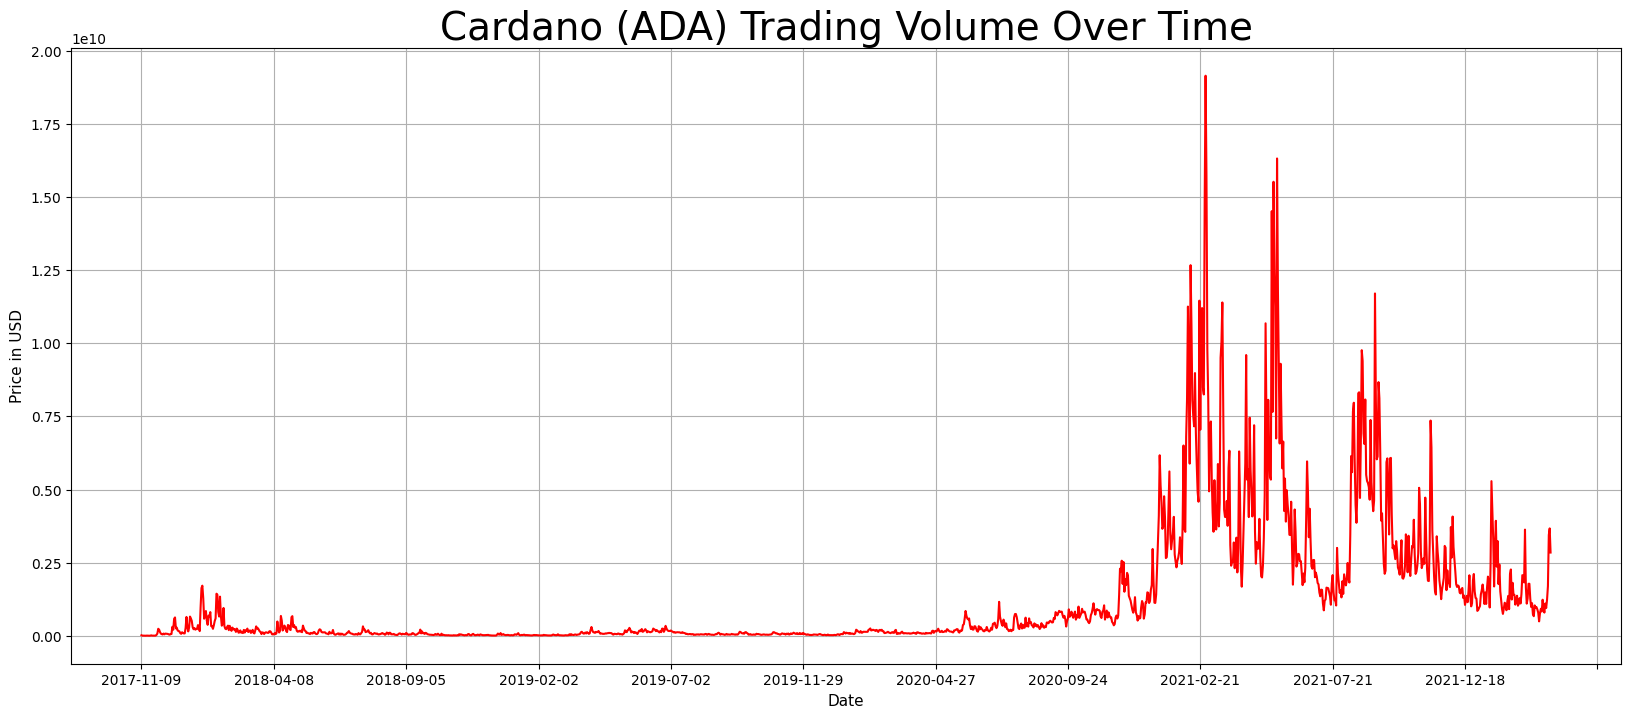

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Volume'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Cardano (ADA) Trading Volume Over Time', fontsize='28')
plt.grid()
plt.show()


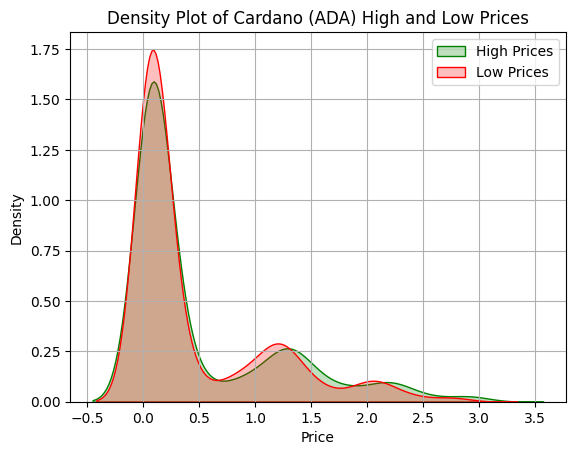

In [ ]:
sns.kdeplot(df['High'], fill=True, color='green', label='High Prices')

# Plot density for 'Low' prices
sns.kdeplot(df['Low'], fill=True, color='red', label='Low Prices')

# Customize the plot
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Cardano (ADA) High and Low Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
high_max = df['High'].max()
high_min = df['High'].min()

low_max = df['Low'].max()
low_min = df['Low'].min()

close_max = df['Close'].max()
close_min = df['Close'].min()

# Print the results
print(f"Highest value of High: {high_max}")
print(f"Lowest value of High: {high_min}")

print(f"Highest value of Low: {low_max}")
print(f"Lowest value of Low: {low_min}")

print(f"Highest value of Close: {close_max}")
print(f"Lowest value of Close: {close_min}")

Highest value of High: 3.099186
Lowest value of High: 0.025993
Highest value of Low: 2.907606
Lowest value of Low: 0.01913
Highest value of Close: 2.968239
Lowest value of Close: 0.023961


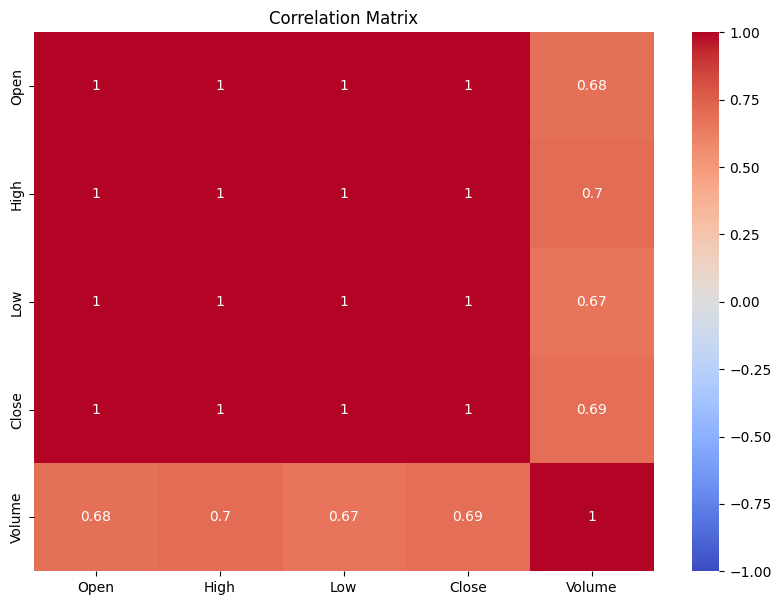

In [ ]:
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.iloc[df['Close'].argmax()]

Date         2021-09-03
Open           2.959315
High           3.029436
Low            2.907606
Close          2.968239
Adj Close      2.968239
Volume       5244576777
Name: 1394, dtype: object

In [ ]:
df['Market Capitalization'] = df['Open'] * df['Volume']

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Capitalization
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200,470899.59200
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780,218018.88482
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220,148766.92802
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250,200061.27000
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440,107675.23616


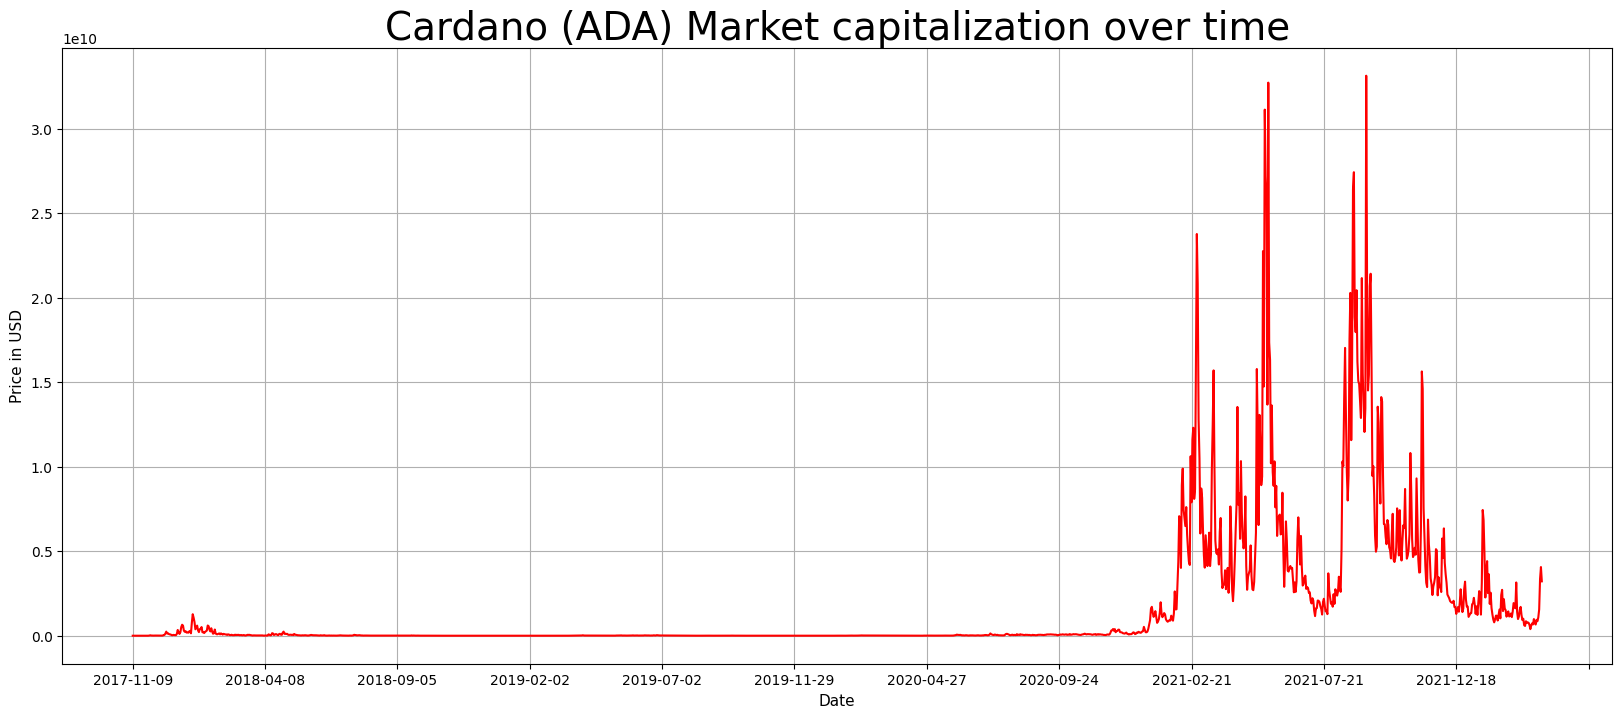

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Market Capitalization'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Cardano (ADA) Market capitalization over time', fontsize='28')
plt.grid()
plt.show()

In [ ]:
df['volatility'] = (df['Close'] / df['Close'].shift(1))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Capitalization,vol,volatility
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200,470899.59200,NaN,NaN
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780,218018.88482,0.846067,0.846067
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220,148766.92802,1.011726,1.011726
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250,200061.27000,0.873893,0.873893
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440,107675.23616,1.076365,1.076365


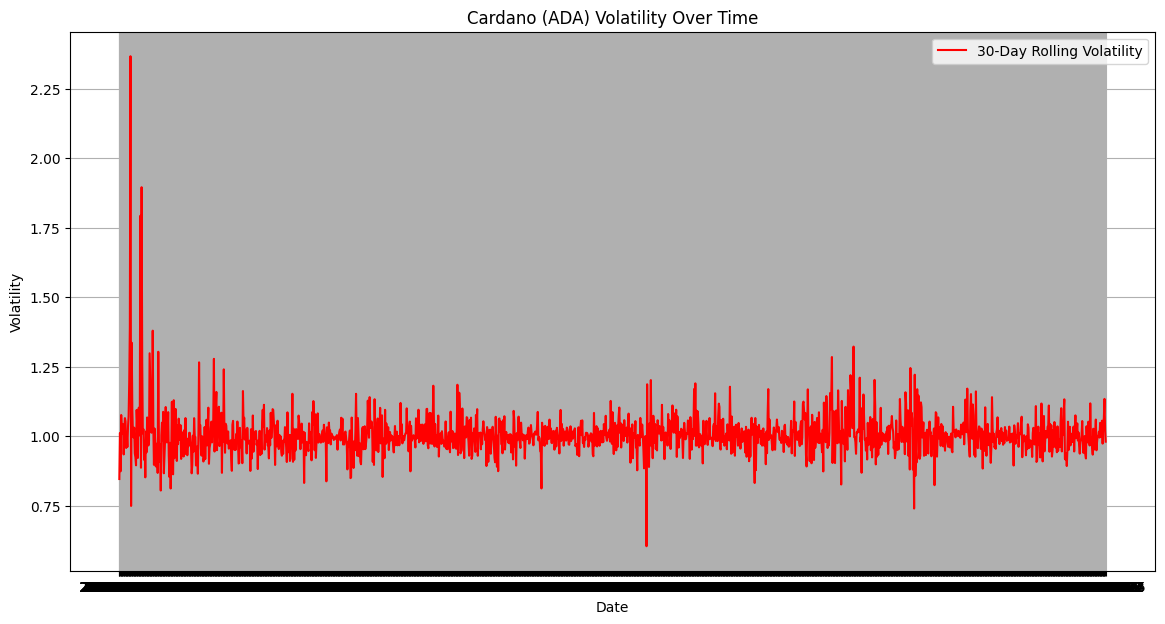

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['volatility'], label='30-Day Rolling Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Cardano (ADA) Volatility Over Time')
plt.legend()
plt.grid(True)
plt.show()

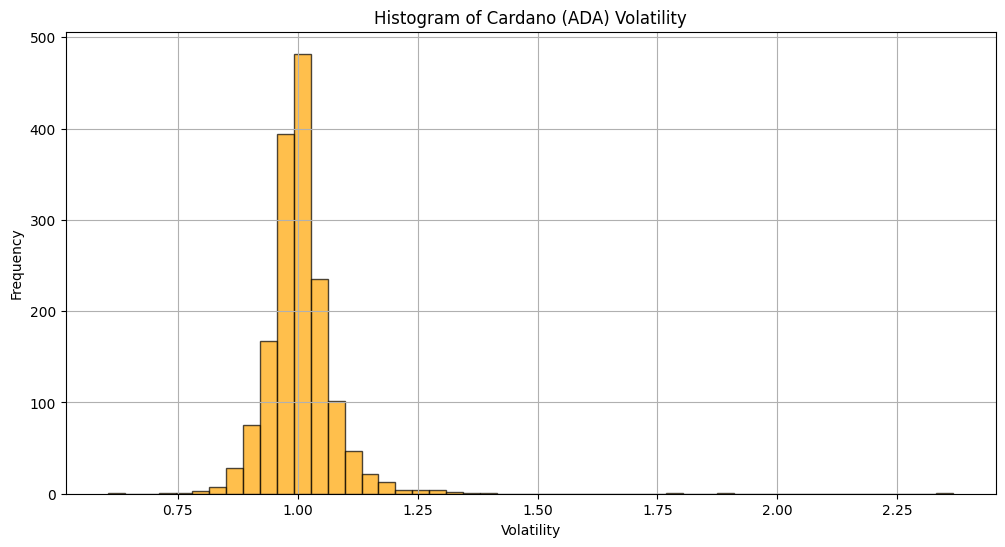

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['volatility'], bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.title('Histogram of Cardano (ADA) Volatility')
plt.grid(True)
plt.show()

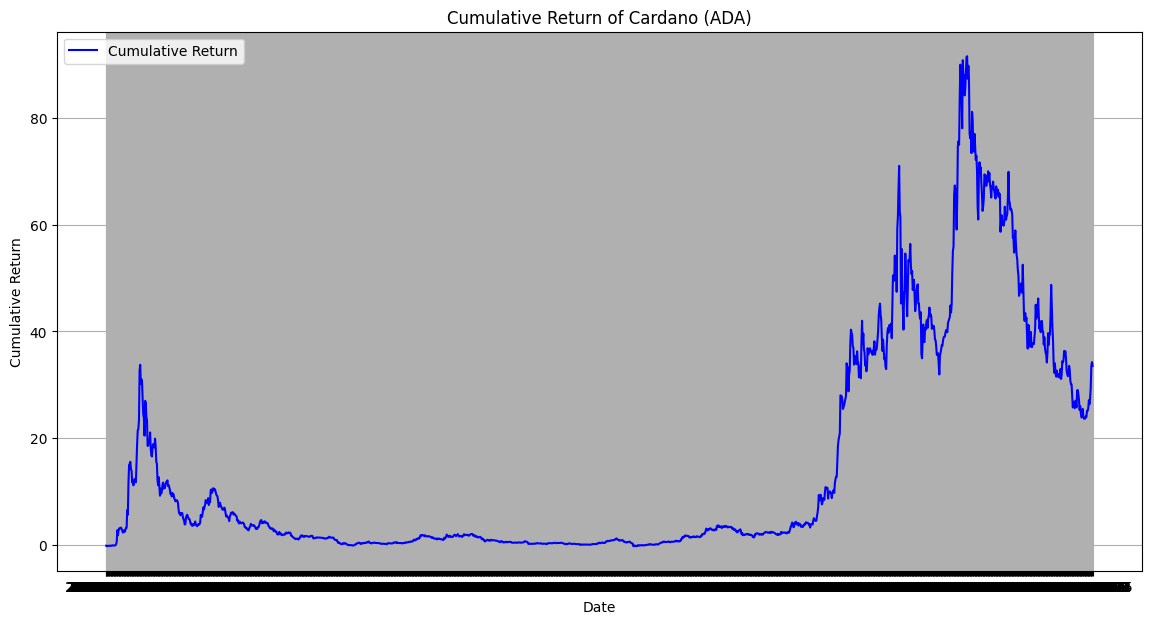

In [ ]:
df['Return'] = df['Close'].pct_change()

# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Cumulative_Return'], label='Cumulative Return', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Cardano (ADA)')
plt.legend()
plt.grid(True)
plt.show()